In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScalerStandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_splitimport

ImportError: ignored

In [3]:
data = pd.read_csv("/content/b_depressed.csv")

FileNotFoundError: ignored

In [ ]:
data.info()

In [ ]:
data.fillna(method ="ffill", inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

<Axes: >

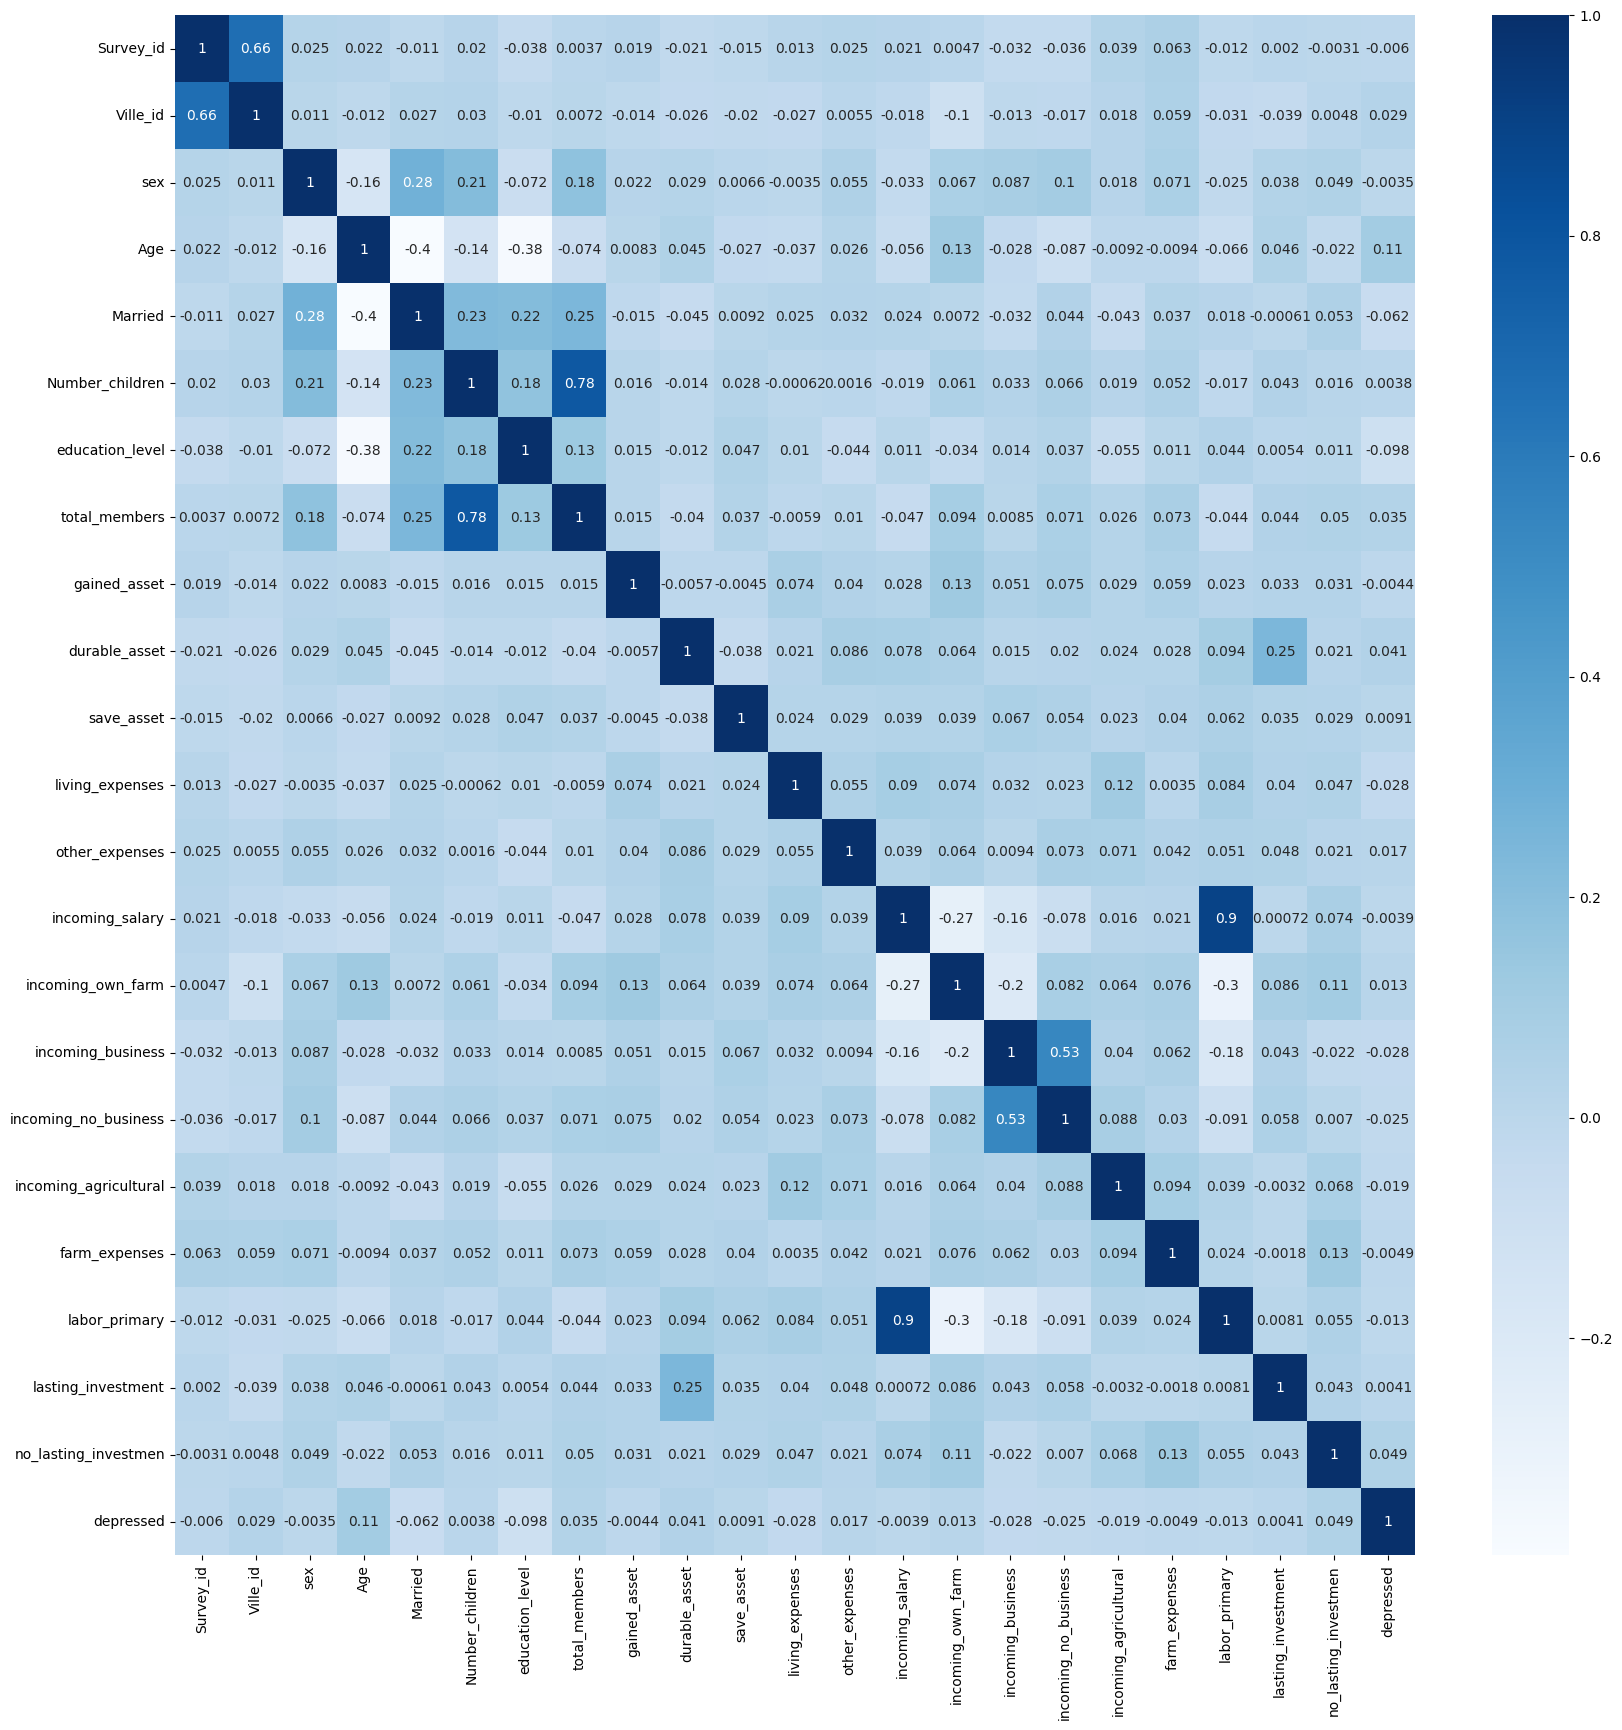

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True,cmap = "Blues")

In [ ]:
X = data.iloc[: ,2:21]
y = data.iloc[: ,22]

In [ ]:
X.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   sex                    1429 non-null   int64
 1   Age                    1429 non-null   int64
 2   Married                1429 non-null   int64
 3   Number_children        1429 non-null   int64
 4   education_level        1429 non-null   int64
 5   total_members          1429 non-null   int64
 6   gained_asset           1429 non-null   int64
 7   durable_asset          1429 non-null   int64
 8   save_asset             1429 non-null   int64
 9   living_expenses        1429 non-null   int64
 10  other_expenses         1429 non-null   int64
 11  incoming_salary        1429 non-null   int64
 12  incoming_own_farm      1429 non-null   int64
 13  incoming_business      1429 non-null   int64
 14  incoming_no_business   1429 non-null   int64
 15  incoming_agricultural  1429 non-null  

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
    remainder = "passthrough"
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
ct.fit(X_train)
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [ ]:
X_train_norm.shape, X_train.shape, X_test.shape, y_train.shape

((1143, 19), (1143, 19), (286, 19), (1143,))

In [ ]:
y_test.shape, y_test.shape, y.shape

((286,), (286,), (1429,))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    # tf.keras.layers.Dense(64, activation = 'sigmoid'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    # tf.keras.layers.Dense(32, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])
history = model.fit(X_train_norm,
          y_train,
          epochs = 100,
          verbose = 1,
          validation_data = (X_test_norm, y_test))

Epoch 1/100
36/36 [==============================] - 2s 8ms/step - loss: 0.6895 - accuracy: 0.7813 - val_loss: 0.6815 - val_accuracy: 0.8357
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.8329 - val_loss: 0.6704 - val_accuracy: 0.8357
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6655 - accuracy: 0.8329 - val_loss: 0.6597 - val_accuracy: 0.8357
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6551 - accuracy: 0.8329 - val_loss: 0.6494 - val_accuracy: 0.8357
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 0.6450 - accuracy: 0.8329 - val_loss: 0.6395 - val_accuracy: 0.8357
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 0.6354 - accuracy: 0.8329 - val_loss: 0.6300 - val_accuracy: 0.8357
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.6262 - accuracy: 0.8329 - val_loss: 0.6209 - val_accuracy: 0.8357
Epoch 8/100
3

In [ ]:
model.evaluate(X_test_norm, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8357


[0.4470353126525879, 0.8356643319129944]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_1 = KNeighborsClassifier()
model_1.fit(X_train_norm, y_train)
model_1.score(X_test_norm, y_test)

0.8076923076923077

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier()
model_2.fit(X_train_norm, y_train)
model_2.score(X_test_norm, y_test)

0.8216783216783217

<Axes: >

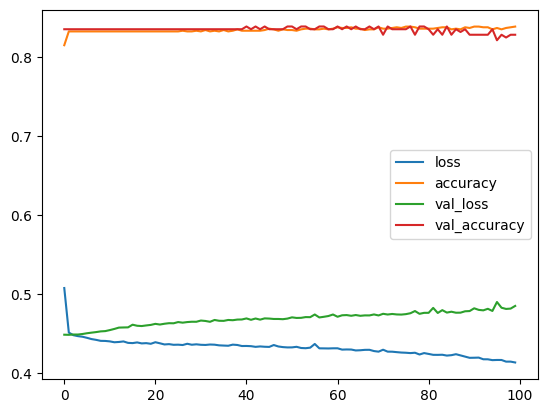

In [ ]:
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'accuracy curves')

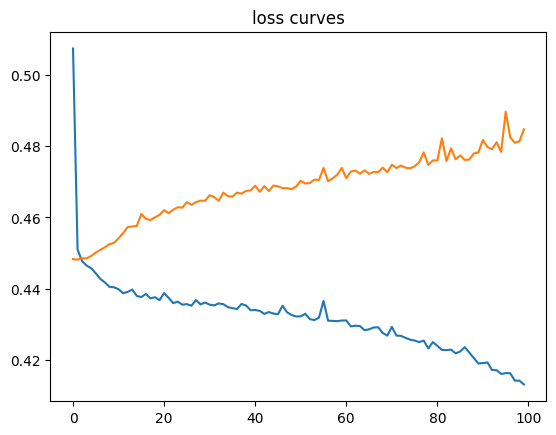

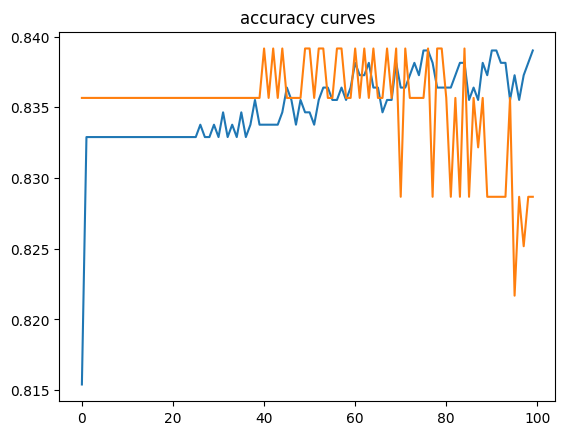

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = np.arange(100)
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("loss curves")
plt.figure()
plt.plot(epochs, accuracy)
plt.plot(epochs, val_acc)
plt.title("accuracy curves")

In [ ]:
# sns.pairplot(data)